# Introduction to the Research Environment

The research environment is powered by IPython notebooks, which allow one to perform a great deal of data analysis and statistical validation. We'll demonstrate a few simple techniques here.

## Code Cells vs. Text Cells

As you can see, each cell can be either code or text. To select between them, choose from the 'Cell Type' dropdown menu on the top left.

## Executing a Command

A code cell will be evaluated when you press play, or when you press the shortcut, shift-enter. Evaluating a cell evaluates each line of code in sequence, and prints the results of the last line below the cell.

In [29]:
2 + 2

4

Sometimes there is no result to be printed, as is the case with assignment.

In [30]:
X = 2

Remember that only the result from the last line is printed.

In [31]:
2 + 2
3 + 3

6

However, you can print whichever lines you want using the `print` statement.

In [32]:
print(2 + 2)
3 + 3

4


6

## Knowing When a Cell is Running

While a cell is running, a `[*]` will display on the left. When a cell has yet to be executed, `[ ]` will display. When it has been run, a number will display indicating the order in which it was run during the execution of the notebook `[5]`. Try on this cell and note it happening.

In [33]:
#Take some time to run something
c = 0
for i in range(10000000):
    c = c + i
c

49999995000000

## Importing Libraries

The vast majority of the time, you'll want to use functions from pre-built libraries. You can't import every library on Quantopian due to security issues, but you can import most of the common scientific ones. Here I import numpy and pandas, the two most common and useful libraries in quant finance. I recommend copying this import statement to every new notebook.

Notice that you can rename libraries to whatever you want after importing. The `as` statement allows this. Here we use `np` and `pd` as aliases for `numpy` and `pandas`. This is a very common aliasing and will be found in most code snippets around the web. The point behind this is to allow you to type fewer characters when you are frequently accessing these libraries.

In [66]:
import numpy as np
import pandas as pd

# This is a plotting library for pretty pictures.
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

##Tab Autocomplete

Pressing tab will give you a list of IPython's best guesses for what you might want to type next. This is incredibly valuable and will save you a lot of time. If there is only one possible option for what you could type next, IPython will fill that in for you. Try pressing tab very frequently, it will seldom fill in anything you don't want, as if there is ambiguity a list will be shown. This is a great way to see what functions are available in a library.

Try placing your cursor after the `.` and pressing tab.

In [35]:
#np.random.

On VScode (which is what I am using) it comes up automatically and you can scroll through the different options.

## Getting Documentation Help

Placing a question mark after a function and executing that line of code will give you the documentation IPython has for that function. It's often best to do this in a new cell, as you avoid re-executing other code and running into bugs.

In [36]:
np.random.normal?

Docstring:
normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

.. note::
    New code should use the `~numpy.random.Generator.normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
loc : float or array_like of floats
    Mean ("centre") of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or "width") of the distribution. Must be
    non-negative.
size : int 

## Sampling

We'll sample some random data using a function from `numpy`.

In [37]:
# Sample 100 points with a mean of 0 and an std of 1. This is a standard normal distribution.
X = np.random.normal(0, 1, 100)

##Plotting

We can use the plotting library we imported as follows.

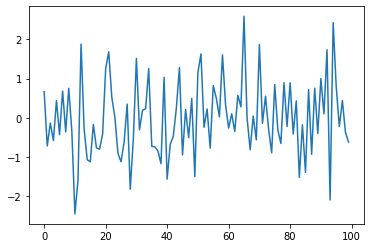

In [38]:
plt.plot(X)

###Squelching Line Output

You might have noticed the annoying line of the form `[<matplotlib.lines.Line2D at 0x7f72fdbc1710>]` before the plots. This is because the `.plot` function actually produces output. Sometimes we wish not to display output, we can accomplish this with the semi-colon as follows.

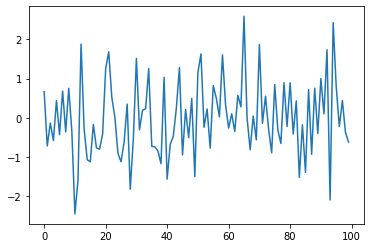

In [39]:
plt.plot(X);

###Adding Axis Labels

No self-respecting quant leaves a graph without labeled axes. Here are some commands to help with that.

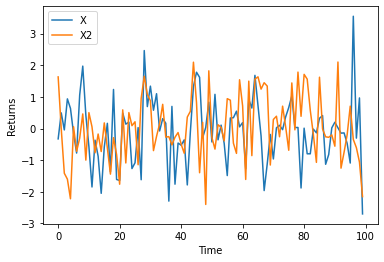

In [40]:
X = np.random.normal(0, 1, 100)
X2 = np.random.normal(0, 1, 100)

plt.plot(X);
plt.plot(X2);
plt.xlabel('Time') # The data we generated is unitless, but don't forget units in general.
plt.ylabel('Returns')
plt.legend(['X', 'X2']);

##Generating Statistics

Let's use `numpy` to take some simple statistics.

In [41]:
np.mean(X)

-0.07699294914334401

In [42]:
np.std(X)

1.0453618788314065

## Getting Real Pricing Data

Randomly sampled data can be great for testing ideas, but let's get some real data. We can use `get_pricing` to do that. You can use the `?` syntax as discussed above to get more information on `get_pricing`'s arguments.

Unfortunately this code was originally written in the Quantopian Environment, which has since shut down, so this function no longer works. I will attempt to use another library to work around this...

In [48]:
#data = get_pricing('MSFT', start_date='2012-1-1', end_date='2015-6-1')

In [45]:
#! pip install yfinance

In [46]:
import yfinance as yf

In [47]:
msft = yf.Ticker("MSFT")

In [51]:
msft.get_shares_full(start = "2012-1-1", end= "2015-6-1")

In [54]:
msft.history(start = "2012-1-1", end= "2015-6-1")
#auto_adjust or back_adjust?

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03 00:00:00-05:00,21.103165,21.429052,20.975990,21.278032,64731500,0.0,0.0
2012-01-04 00:00:00-05:00,21.317767,21.834417,21.285974,21.778778,80516100,0.0,0.0
2012-01-05 00:00:00-05:00,21.762886,22.041083,21.691351,22.001341,56081400,0.0,0.0
2012-01-06 00:00:00-05:00,21.882116,22.406714,21.882116,22.343126,99455500,0.0,0.0
2012-01-09 00:00:00-05:00,22.295434,22.335177,22.033135,22.049032,59706800,0.0,0.0
...,...,...,...,...,...,...,...
2015-05-22 00:00:00-04:00,41.478937,41.522783,41.058010,41.128166,25720600,0.0,0.0
2015-05-26 00:00:00-04:00,41.066781,41.110627,40.505541,40.856316,29581900,0.0,0.0
2015-05-27 00:00:00-04:00,41.058019,41.891106,40.882632,41.750797,27335600,0.0,0.0


Hmmmmmm... All of the numbers here are different from the values shown in the video... The numbers of past historical data shouldn't change with time... I'm not really sure what to make of this...

The volume is correct... the prices are all off...

In [56]:
msft.history(start = "2012-1-1", end= "2015-6-1", auto_adjust = False)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2012-01-03 00:00:00-05:00,26.549999,26.959999,26.389999,26.770000,21.278032,64731500,0.0,0.0
2012-01-04 00:00:00-05:00,26.820000,27.469999,26.780001,27.400000,21.778778,80516100,0.0,0.0
2012-01-05 00:00:00-05:00,27.379999,27.730000,27.290001,27.680000,22.001341,56081400,0.0,0.0
2012-01-06 00:00:00-05:00,27.530001,28.190001,27.530001,28.110001,22.343126,99455500,0.0,0.0
2012-01-09 00:00:00-05:00,28.049999,28.100000,27.719999,27.740000,22.049032,59706800,0.0,0.0
...,...,...,...,...,...,...,...,...
2015-05-22 00:00:00-04:00,47.299999,47.349998,46.820000,46.900002,41.128166,25720600,0.0,0.0
2015-05-26 00:00:00-04:00,46.830002,46.880001,46.189999,46.590000,40.856316,29581900,0.0,0.0
2015-05-27 00:00:00-04:00,46.820000,47.770000,46.619999,47.610001,41.750797,27335600,0.0,0.0


After looking through the params a bit, it looks like `auto_adjust` is messing with the prices. The only description is "Adjust all OHLC automatically? Default is True" which I don't currently understand. However, it looks like I can continue on with this for now...

In [58]:
data = msft.history(start = "2012-1-1", end= "2015-6-1", auto_adjust = False)

In [59]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

The column names are aldo a bit difference.

Our data is now a dataframe. You can see the datetime index and the colums with different pricing data.

In [ ]:
data

This is a pandas dataframe, so we can index in to just get price like this. For more info on pandas, please [click here](http://pandas.pydata.org/pandas-docs/stable/10min.html).

In [60]:
#X = data['price']
X = data['Close']

Because there is now also date information in our data, we provide two series to `.plot`. `X.index` gives us the datetime index, and `X.values` gives us the pricing values. These are used as the X and Y coordinates to make a graph.

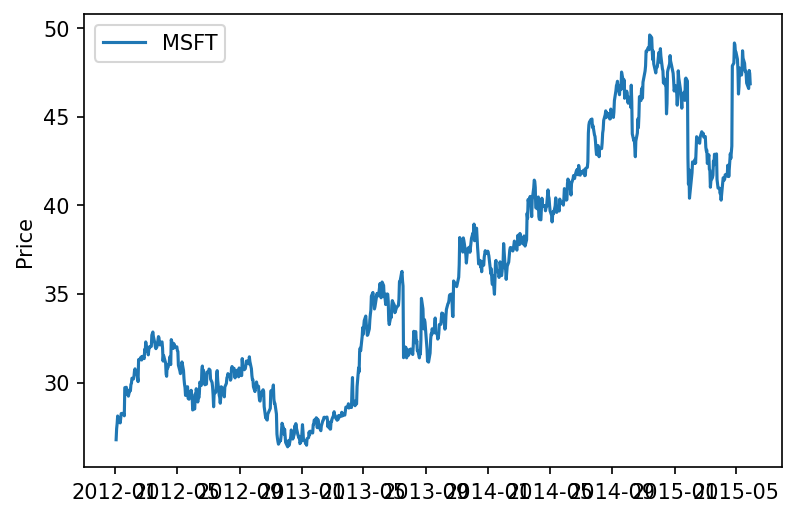

In [67]:
plt.plot(X.index, X.values)
plt.ylabel('Price')
plt.legend(['MSFT']);

We can get statistics again on real data.

In [62]:
np.mean(X)

36.05204441837061

In [63]:
np.std(X)

6.691260772637948

##Getting Returns from Prices

We can use the `pct_change` function to get returns. Notice how we drop the first element after doing this, as it will be `NaN` (nothing -> something results in a NaN percent change).

In [68]:
R = X.pct_change()[1:] #this is a pandas function so its fine.

We can plot the returns distribution as a histogram.

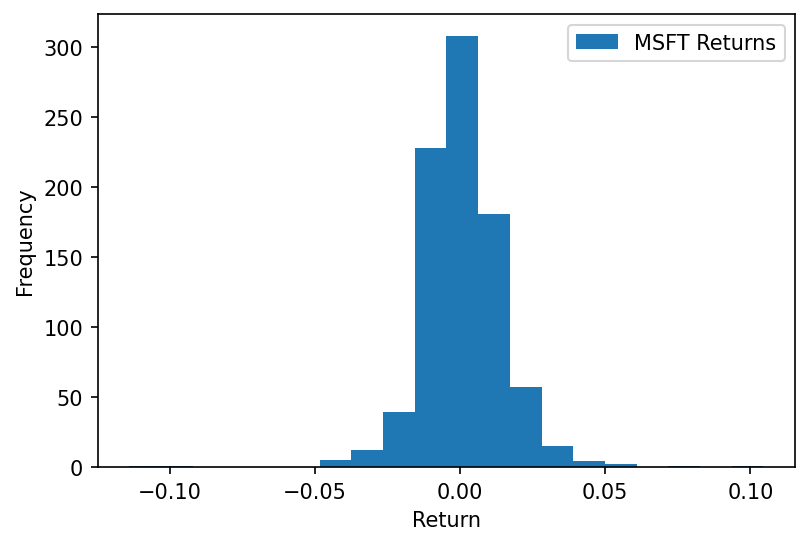

In [69]:
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['MSFT Returns']);

Get statistics again.

In [ ]:
np.mean(R)

In [ ]:
np.std(R)

Now let's go backwards and generate data out of a normal distribution using the statistics we estimated from Microsoft's returns. We'll see that we have good reason to suspect Microsoft's returns may not be normal, as the resulting normal distribution looks far different.

In [ ]:
plt.hist(np.random.normal(np.mean(R), np.std(R), 10000), bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns']);

## Generating a Moving Average

`pandas` has some nice tools to allow us to generate rolling statistics. Here's an example. Notice how there's no moving average for the first 60 days, as we don't have 60 days of data on which to generate the statistic.

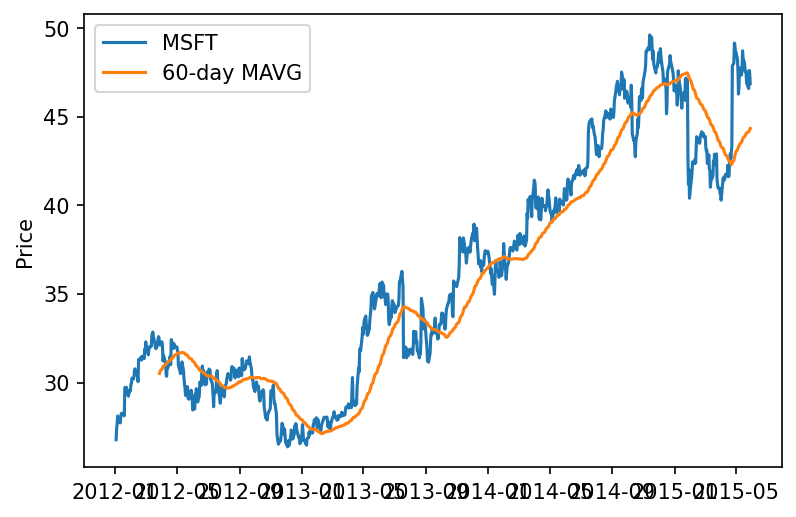

: 

In [72]:
# Take the average of the last 60 days at each timepoint.
#MAVG = pd.rolling_mean(X, window=60)
MAVG = X.rolling(60).mean() #updated usage of rolling
plt.plot(X.index, X.values)
plt.plot(MAVG.index, MAVG.values)
plt.ylabel('Price')
plt.legend(['MSFT', '60-day MAVG']);

This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.